# Chapter 7: Dijkstra's algorithm

- We continue the discussion of graphs, and you learn about weighted graphs: a way to assign more or less weight to some edges.
- You learn Dijkstra’s algorithm, which lets you answer “What’s the shortest path to X?” for weighted graphs.
- You learn about cycles in graphs, where Dijkstra’s algorithm doesn’t work.

You used breadth-first search in the last chapter. Breadth-first search will find you the path with the fewest segments (the first graph shown here). What if you want the fastest path instead (the second graph)? You can do that fastest with a different algorithm called Dijkstra’s algorithm.

## Working with Dijkstra's algorithm

There are four steps to Dijkstra’s algorithm:
1. Find the cheapest node. This is the node you can get to in the least amount of time.
2. Check whether there’s a cheaper path to the neighbors of this node. If so, update their costs.
3. Repeat until you’ve done this for every node in the graph.
4. Calculate the final path. (Coming up in the next section!)

Probelm: Each segment has a travel time in minutes. You’ll use Dijkstra’s algorithm to go from start to finish in the shortest possible time.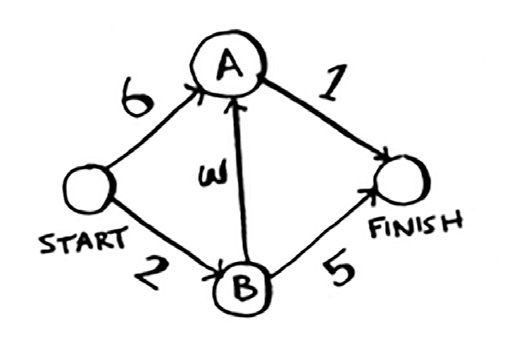

### Step 1: Find the cheapest node. You’re standing at the start, wondering if you should go to node A or node B. How long does it take to get to each node?
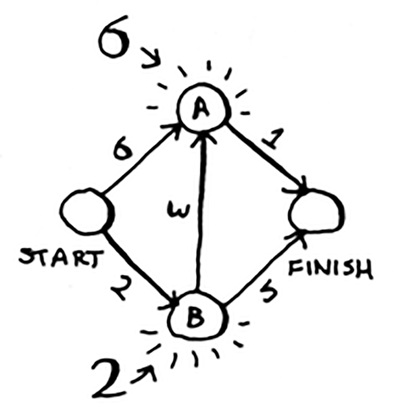

It takes 6 minutes to get to node A and 2 minutes to get to node B. The rest of the nodes, you don’t know yet. Because you don’t know how long it takes to get to the finish yet, you put down infinity (you’ll see why soon). Node B is the closest node … it’s 2 minutes away. 
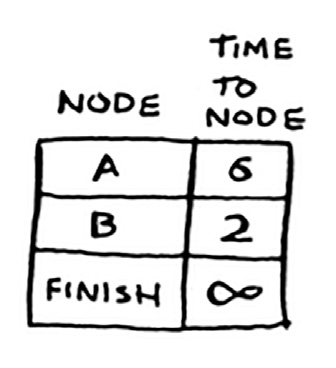

### Step 2: Calculate how long it takes to get to all of node B’s neighbors by following an edge from B.
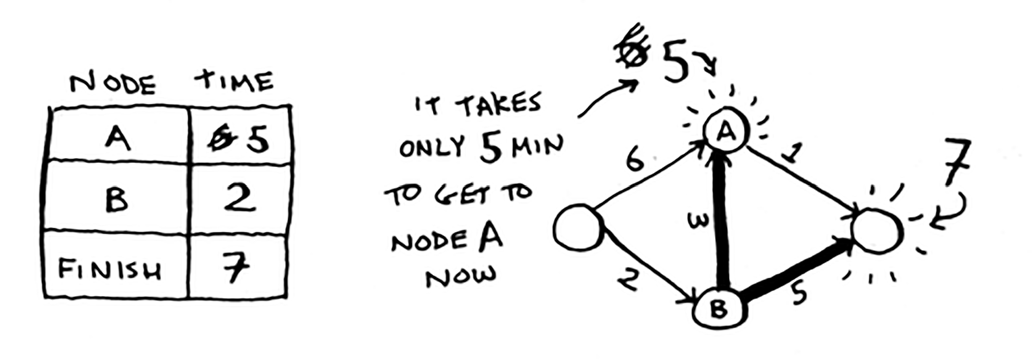

Hey, you just found a shorter path to node A! It used to take 6 minutes to get to node A.
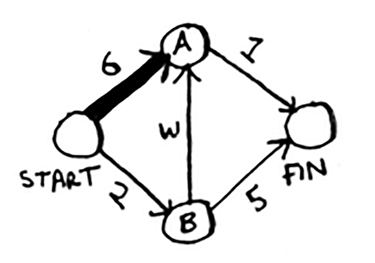

But if you go through node B, there’s a path that only takes 5 minutes!
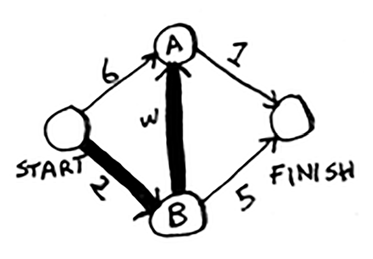

When you find a shorter path for a neighbor of B, update its cost. In this
case, you found
- A shorter path to A (down from 6 minutes to 5 minutes)
- A shorter path to the finish (down from infinity to 7 minutes)

### Step 3: Repeat!

### Step 1 again: Find the node that takes the least amount of time to get to. You’re done with node B, so node A has the next smallest time estimate.
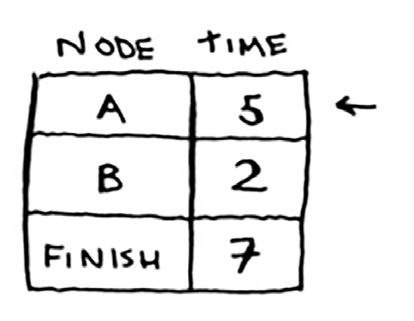

### Step 2 again: Update the costs for node A’s neighbors.
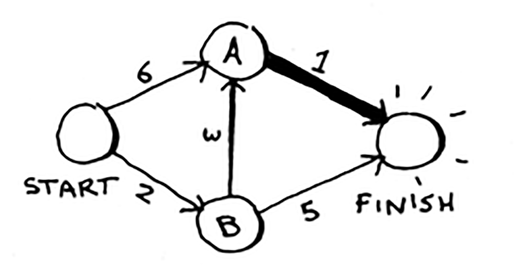

Woo, it takes 6 minutes to get to the finish now!
You’ve run Dijkstra’s algorithm for every node (you don’t need to run itfor the finish node). At this point, you know
- It takes 2 minutes to get to node B.
- It takes 5 minutes to get to node A.
- It takes 6 minutes to get to the finish.

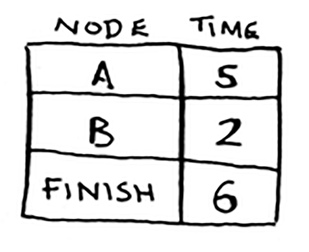

I’ll save the last step, calculating the final path, for the next section. For now, I’ll just show you what the final path is.
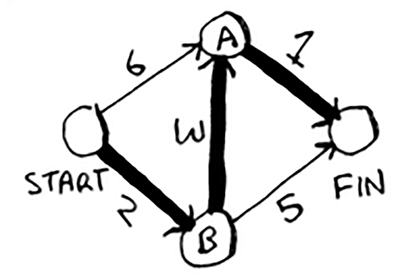

## Terminology

When you work with Dijkstra’s algorithm, each edge in the graph has a number associated with it. These are called weights.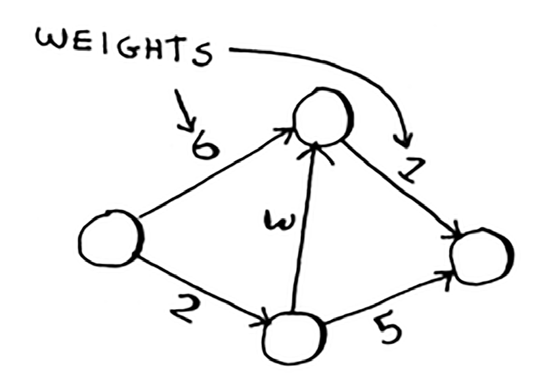

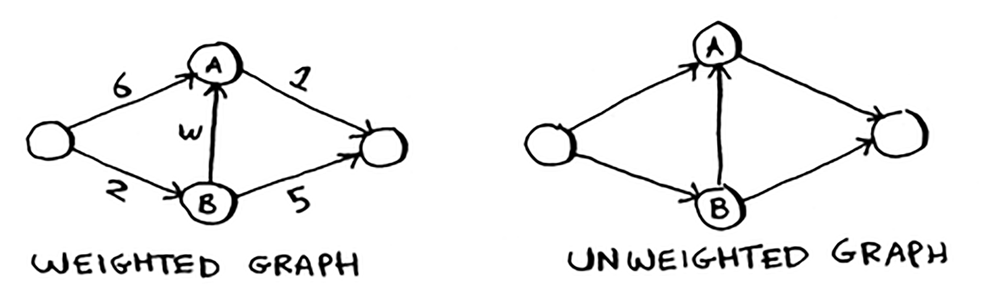

To calculate the shortest path in an unweighted graph, use breadth-first search. To calculate the shortest path in a weighted graph, use Dijkstra’s algorithm. Graphs can also have cycles. A cycle looks like this.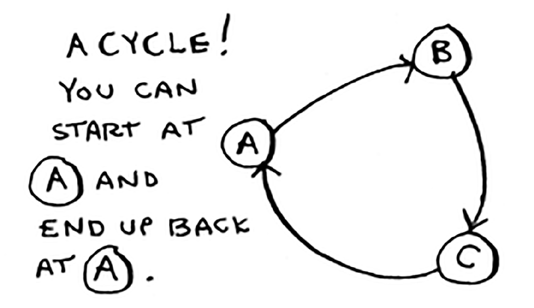

It means you can start at a node, travel around, and end up at the same
node. Suppose you’re trying to find the shortest path in this graph that
has a cycle.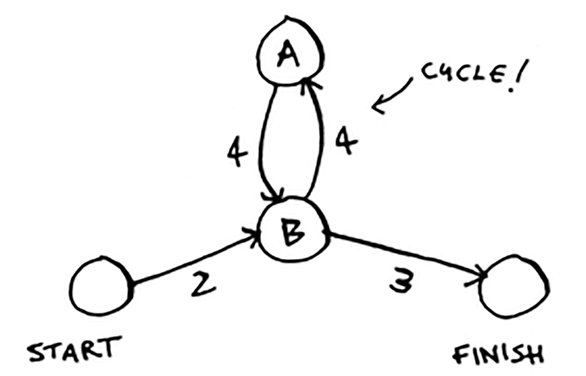

Would it make sense to follow the cycle? Well, you can use the path that avoids the cycle.
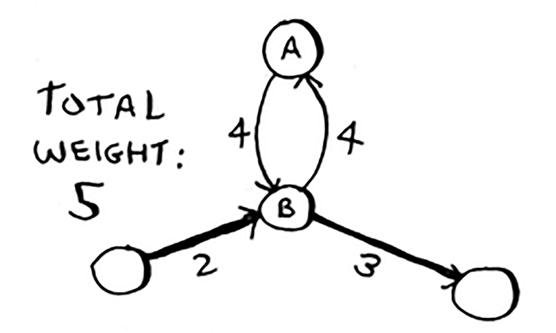

Or you can follow the cycle.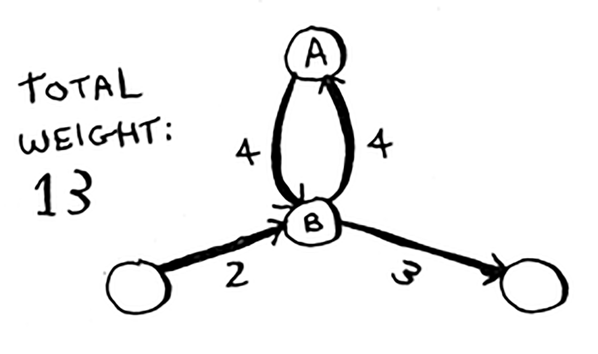

You end up at node A either way, but the cycle adds more weight. You could even follow the cycle twice if you wanted.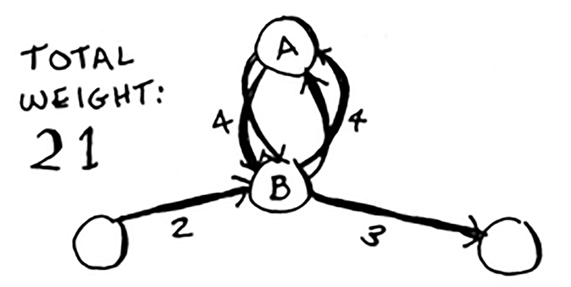

But every time you follow the cycle, you’re just adding 8 to the total weight. So following the cycle will never give you the shortest path.

Finally, remember our conversation about directed versus undirected
graphs from chapter 6?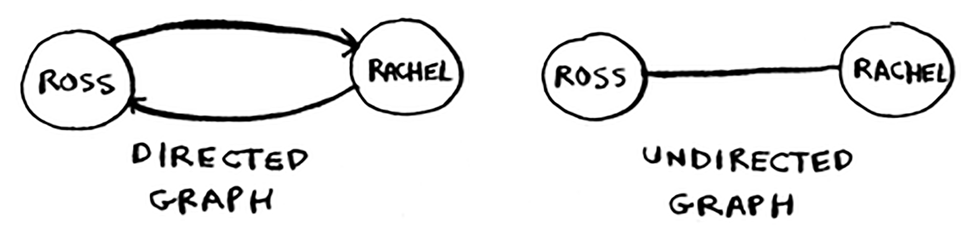

An undirected graph means that both nodes point to each other. That’s a cycle!
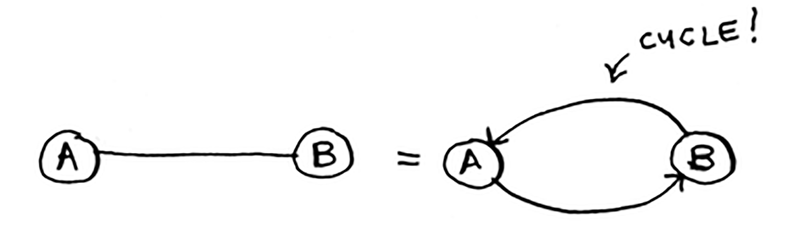

With an undirected graph, each edge adds another cycle. Dijkstra’s algorithm only works with directed acyclic graphs, called DAGs for short.

## Trading for a piano

Enough terminology, let’s look at another example! This is Rama. Rama is trying to trade a music book for a piano.

“I’ll give you this poster for your book,” says Alex. “It’s a poster of my favorite band, Destroyer. Or I’ll give you this rare LP of Rick Astley for your book and $5 more.” “Ooh, I’ve heard that LP has a really great song,” says Amy. “I’ll trade you my guitar or drum set for the poster or the LP.”

“I’ve been meaning to get into guitar!” exclaims Beethoven. “Hey, I’ll trade you my piano for either of Amy’s things.”

Perfect! With a little bit of money, Rama can trade his way from a piano book to a real piano. Now he just needs to figure out how to spend the least amount of money to make those trades. Let’s graph out what he’s been offered.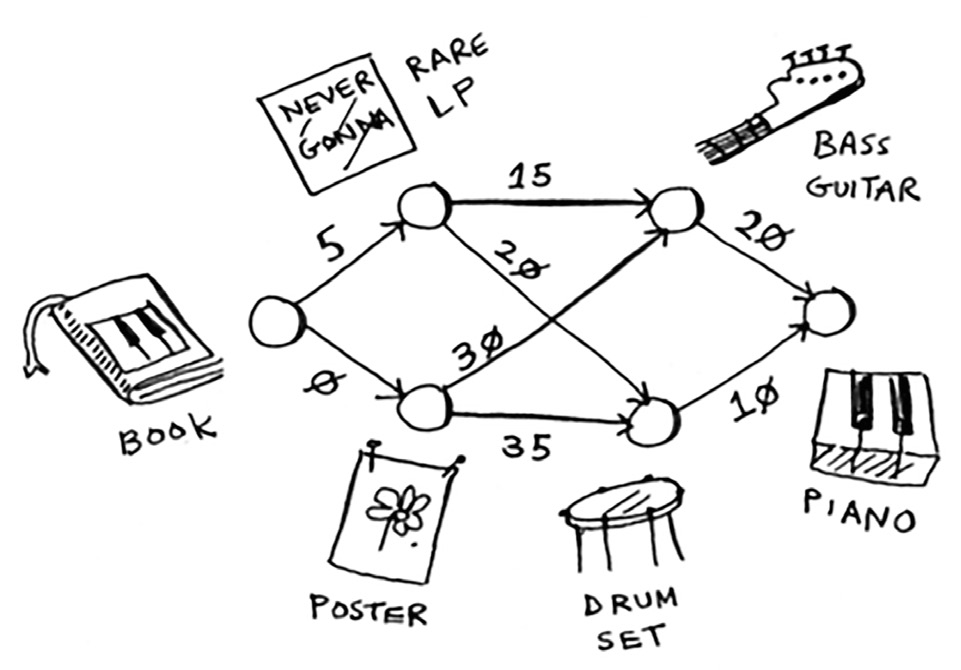

In this graph, the nodes are all the items Rama can trade for. The weights on the edges are the amount of money he would have to pay to make the trade. So he can trade the poster for the guitar for $30, or trade the LP for the guitar for $15. How is Rama going to figure out the path from the book to the piano where he spends the least dough? Dijkstra’s algorithm to the rescue! Remember, Dijkstra’s algorithm has four steps. In this example, you’ll do all four steps, so you’ll calculate the final path at the end, too.

Before you start, you need some setup. Make a table of the cost for each node. The cost of a node is how expensive it is to get to.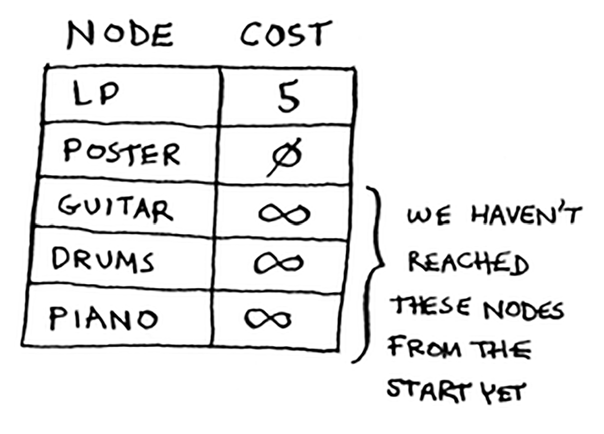

You’ll keep updating this table as the algorithm goes on. To calculate the final path, you also need a parent column on this table.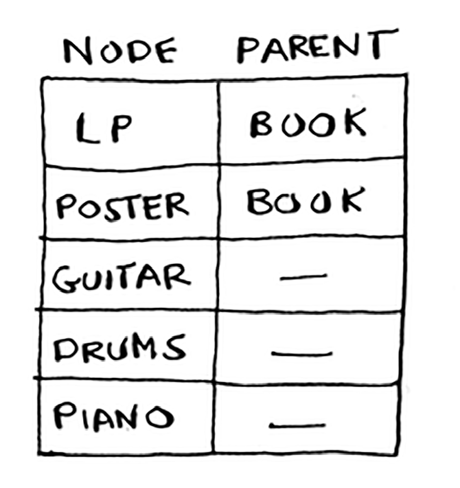


I’ll show you how this column works soon. Let’s start the algorithm.

### Step 1: 

Find the cheapest node. In this case, the poster is the cheapest trade, at $0. Is there a cheaper way to trade for the poster? This is a really important point, so think about it. Can you see a series of trades that will get Rama the poster for less than $0? Read on when you’re ready. Answer: No. Because the poster is the cheapest node Rama can get to, there’s no way to make it any cheaper. Here’s a different way to look at it. Suppose you’re traveling from home to work.
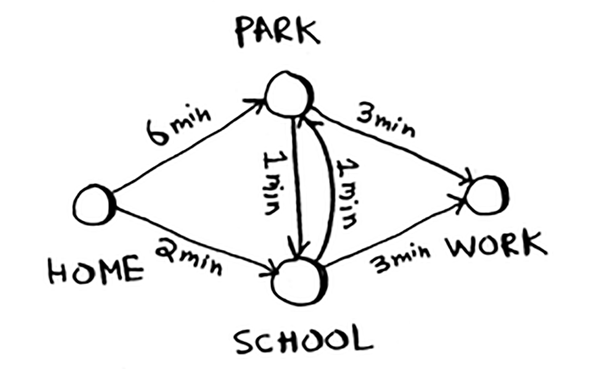

If you take the path toward the school, that takes 2 minutes. If you take the path toward the park, that takes 6 minutes. Is there any way you can take the path toward the park, and end up at the school, in less than 2 minutes? It’s impossible, because it takes longer than 2 minutes just to get to the park. On the other hand, can you find a faster path to the park? Yup.
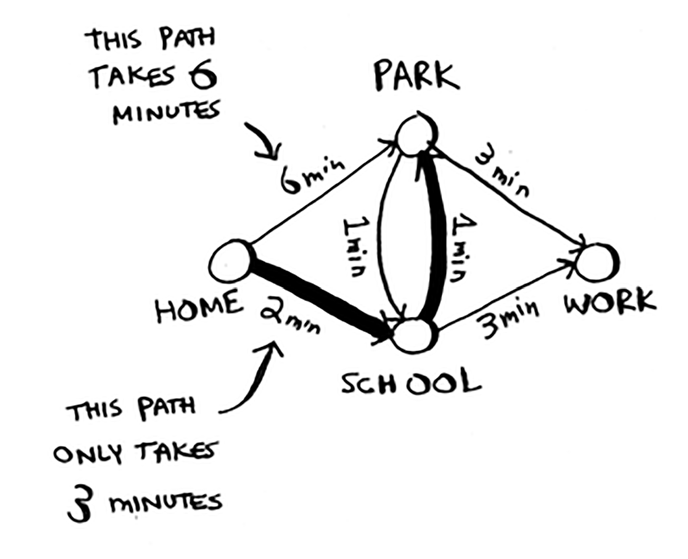

This is the key idea behind Dijkstra’s algorithm: Look at the cheapest node on your graph. There is no cheaper way to get to this node! Back to the music example. The poster is the cheapest trade.

### Step 2
Figure out how long it takes to get to its neighbors (the cost).
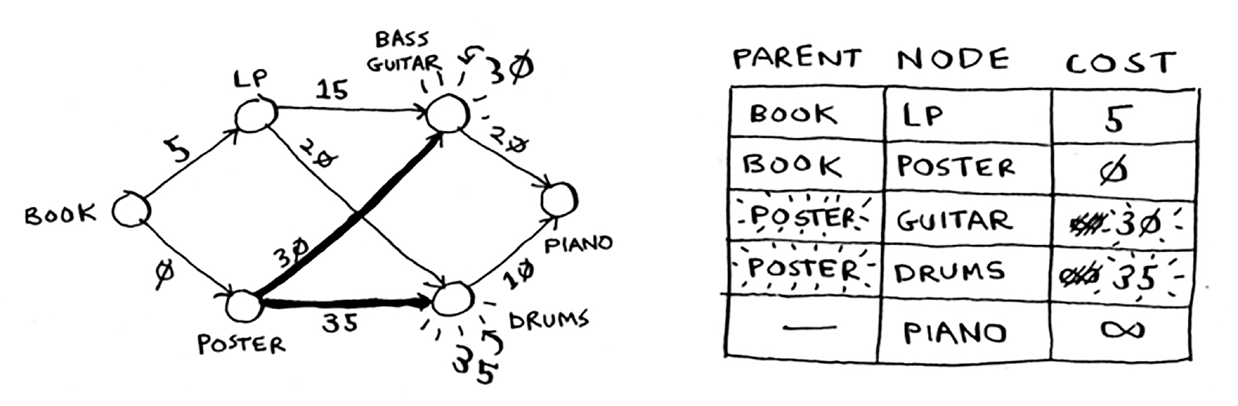

You have prices for the bass guitar and the drum set in the table. Their value was set when you went through the poster, so the poster gets set as their parent. That means, to get to the bass guitar, you follow the edge from the poster, and the same for the drums.
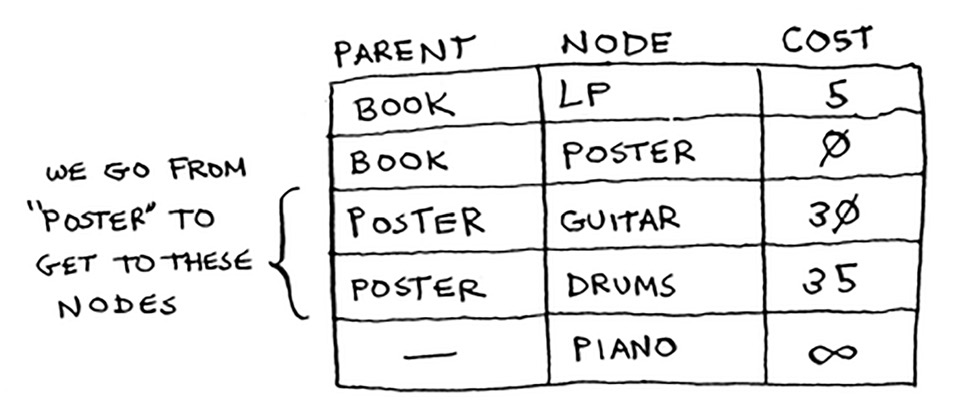

#### Step 1 again:
The LP is the next cheapest node at $5.

#### Step 2 again: Update the values of all of its neighbors.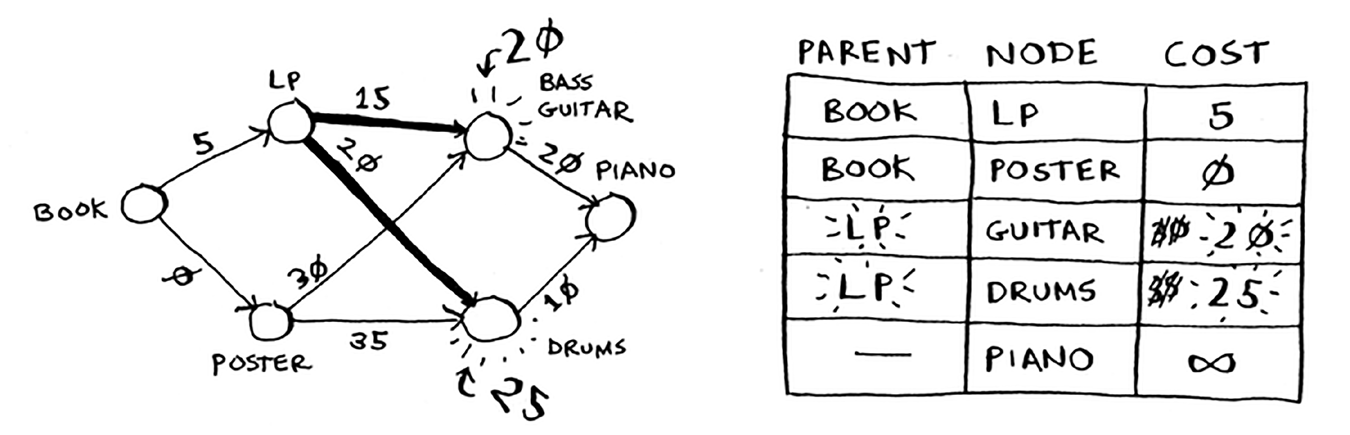

Hey, you updated the price of both the drums and the guitar! That means it’s cheaper to get to the drums and guitar by following the edge from the LP. So you set the LP as the new parent for both instruments.

The bass guitar is the next cheapest item. Update its neighbors.
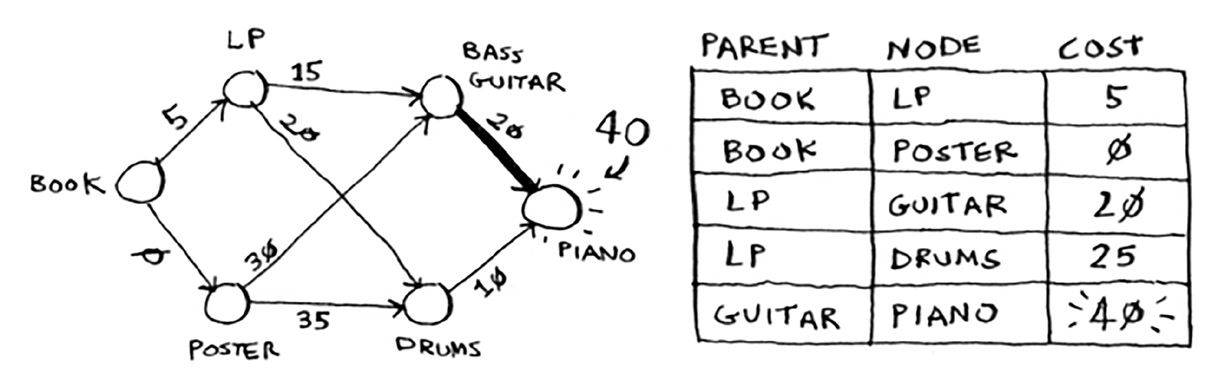

Ok, you finally have a price for the piano, by trading the guitar for the piano. So you set the guitar as the parent. Finally, the last node, the drum set.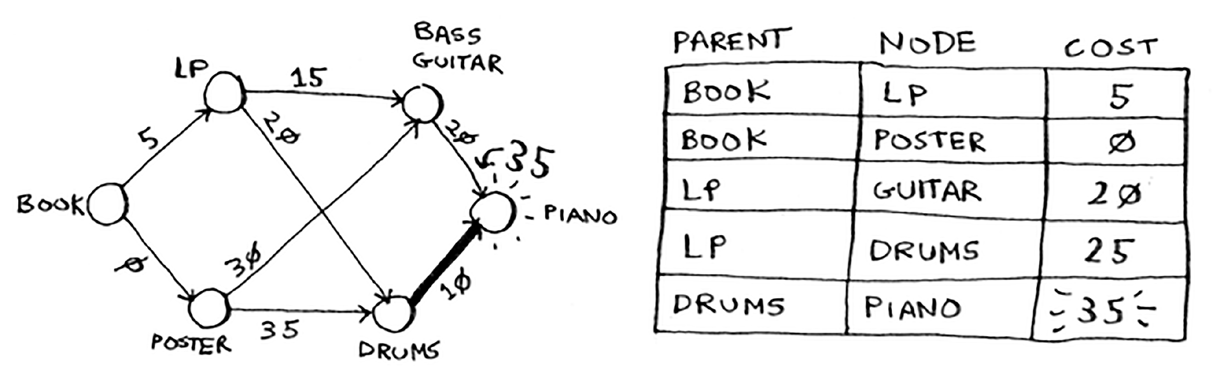

Rama can get the piano even cheaper by trading the drum set for the piano instead. So the cheapest set of trades will cost Rama $35.

Now, as I promised, you need to figure out the path. So far, you know that the shortest path costs $35, but how do you figure out the path? To start with, look at the parent for piano.
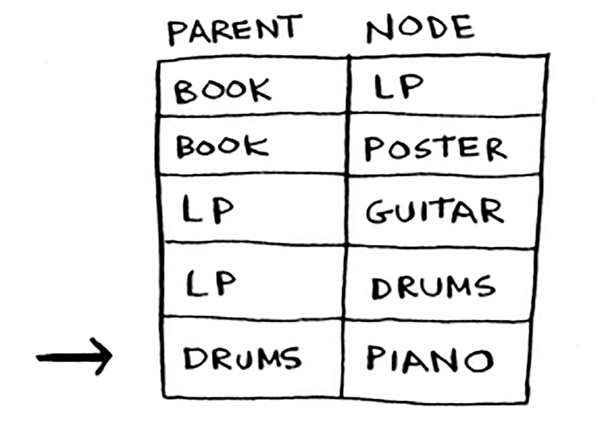

The piano has drums as its parent. That means Rama trades the drums for the piano. So you follow this edge.

Let’s see how you’d follow the edges. Piano has drums as its parent.
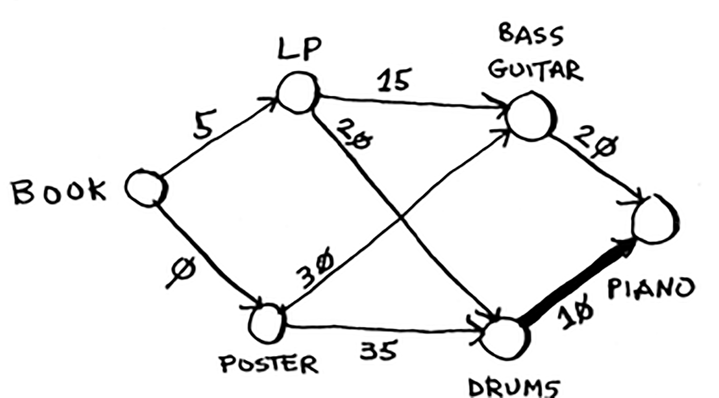

And drums has the LP as its parent.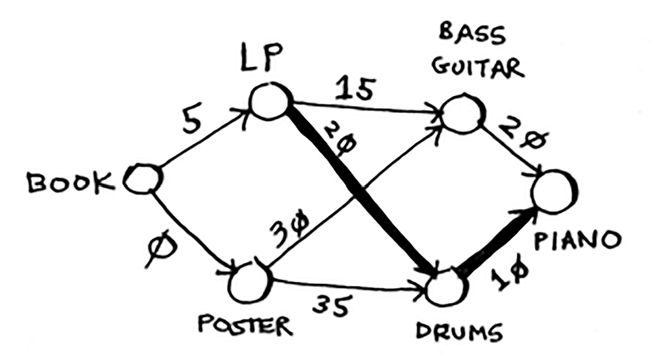

So Rama will trade the LP for the drums. And of course, he’ll trade the book for the LP. By following the parents backward, you now have the complete path.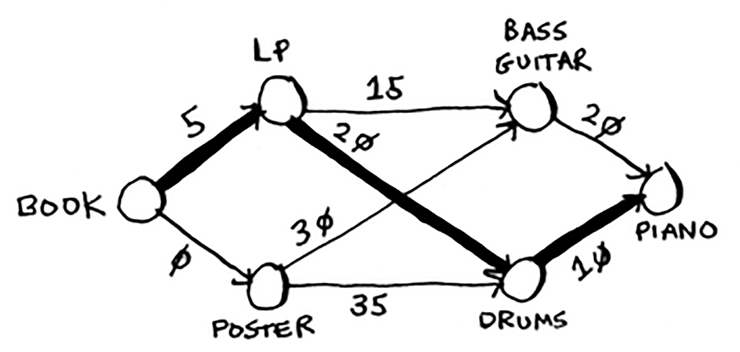

Here’s the series of trades Rama needs to make.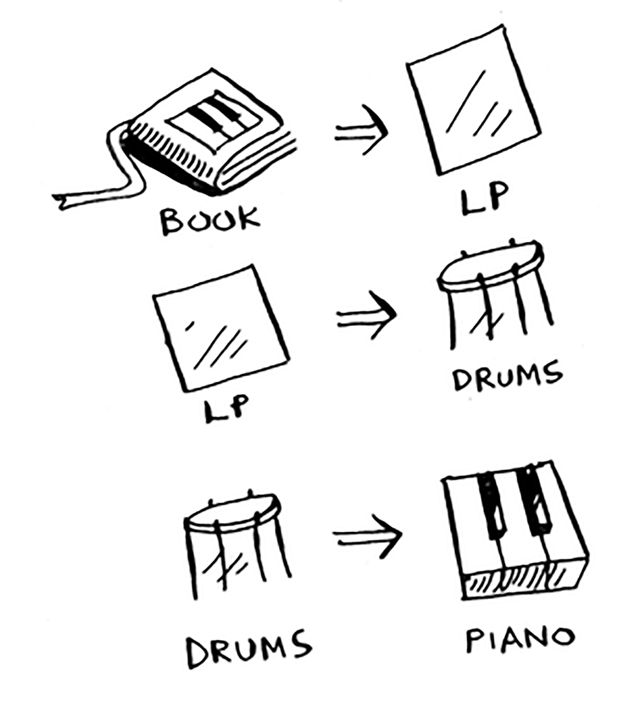

So far, I’ve been using the term shortest path pretty literally: calculating the shortest path between two locations or between two people. I hope this example showed you that the shortest path doesn’t have to be about physical distance. It can be about minimizing something. In this case, Rama wanted to minimize the amount of money he spent. Thanks, Dijkstra!

## Negative-weight edges

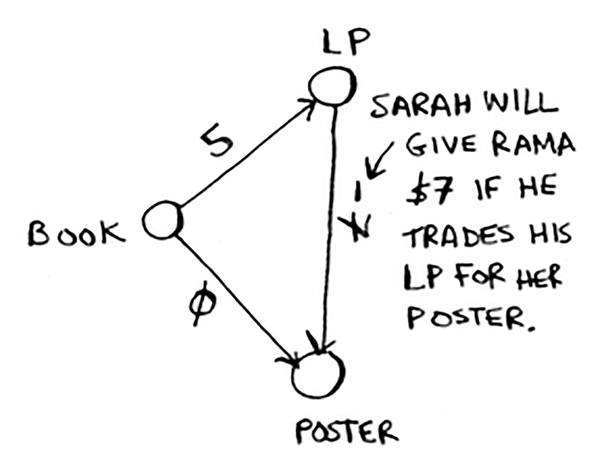
You can’t use Dijkstra’s algorithm if you have negative-weight edges. Negative-weight edges break the algorithm.

If you want to find the shortest path in a graph that has negative-weight edges, there’s an algorithm for that! It’s called the Bellman-Ford algorithm. Bellman-Ford is out of the scope of this book, but you can find some great explanations online.

## Implementation

Let’s see how to implement Dijkstra’s algorithm in code. Here’s the graph I’ll use for the example.
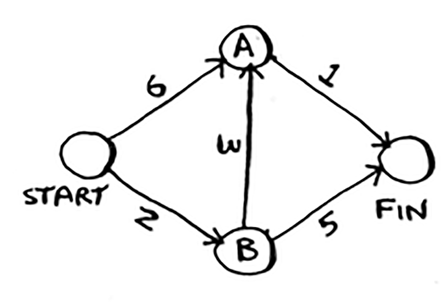

To code this example, you’ll need three hash tables.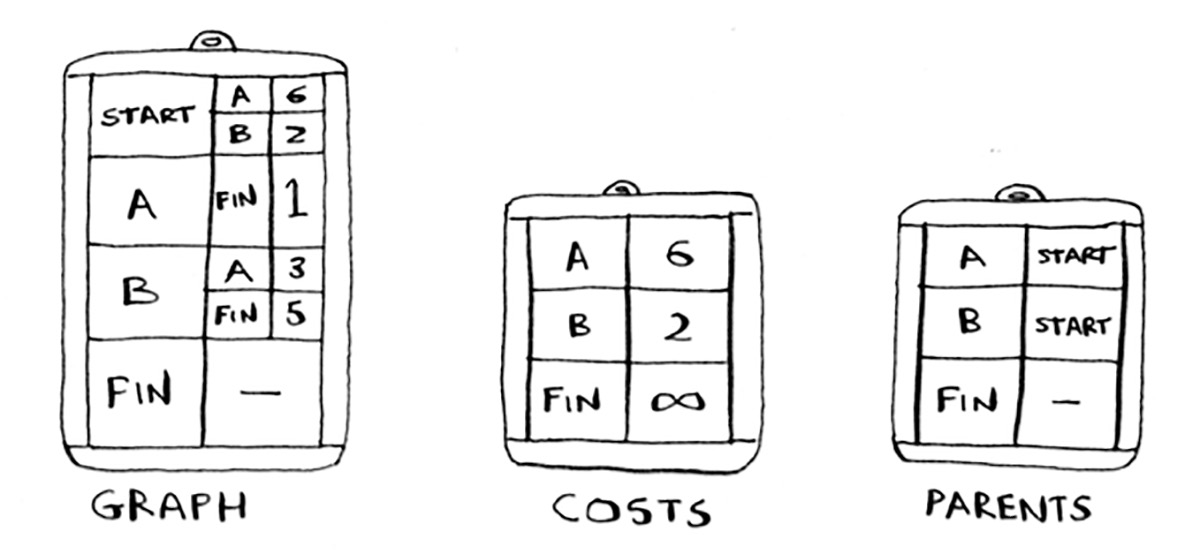

You’ll update the costs and parents hash tables as the algorithm progresses. First, you need to implement the graph. You’ll use a hash table like you did in chapter 6:

    graph = {}

In the last chapter, you stored all the neighbors of a node in the hash table, like this:

    graph[“you”] = [“alice”, “bob”, “claire”]

But this time, you need to store the neighbors and the cost for getting to that neighbor. For example, Start has two neighbors, A and B. 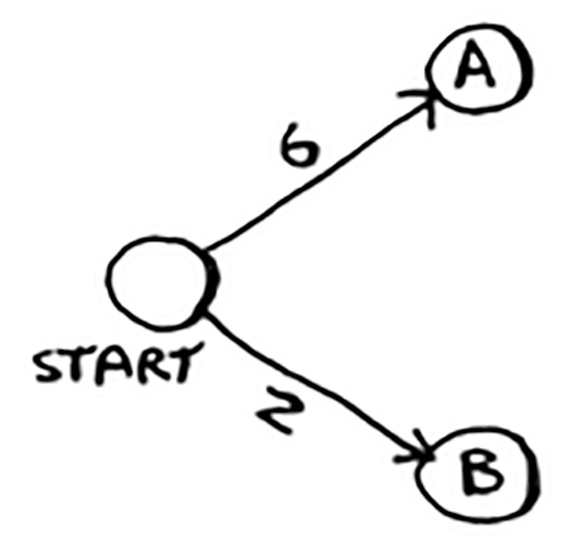

How do you represent the weights of those edges? Why not just use another hash table?

    graph[“start”] = {}
    graph[“start”][“a”] = 6
    graph[“start”][“b”] = 2
    
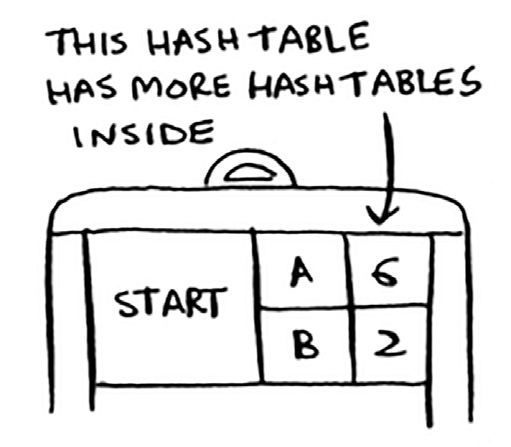

So graph[“start”] is a hash table. You can get all the neighbors for Start like this:

```python
print(graph[“start”].keys())
```
> Output: [“a”, “b”]

There’s an edge from Start to A and an edge from Start to B. What if you want to find the weights of those edges?

```python
print(graph[“start”][“a”])
```
> Output: 2

```python
print(graph[“start”][“b”])
```
> Output: 6

Let’s add the rest of the nodes and their neighbors to the graph:

    graph[“a”] = {}
    graph[“a”][“fin”] = 1
    graph[“b”] = {}
    graph[“b”][“a”] = 3
    graph[“b”][“fin”] = 5
    graph[“fin”] = {} # The finish node doesn’t have any neighbors.

The full graph hash table looks like this.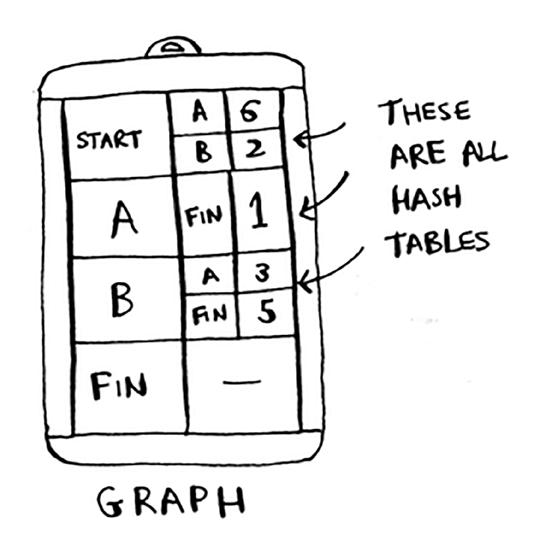

Next you need a hash table to store the costs for each node.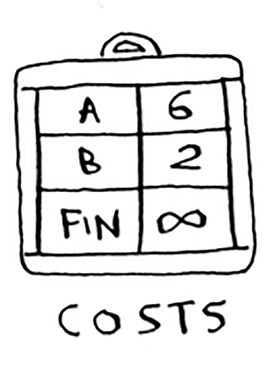

The cost of a node is how long it takes to get to that node from the start. You know it takes 2 minutes from Start to node B. You know it takes 6 minutes to get to node A (although you may find a path that takes less time). You don’t know how long it takes to get to the finish. If you don’t know the cost yet, you put down infinity. Can you represent infinity in Python? Turns out, you can:

    infinity = float(“inf”)

Here’s the code to make the costs table:
    
    infinity = float(“inf”)
    costs = {}
    costs[“a”] = 6
    costs[“b”] = 2
    costs[“fin”] = infinity
    
You also need another hash table for the parents: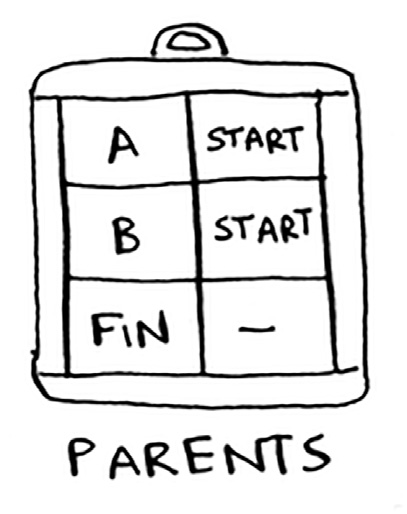

Here’s the code to make the hash table for the parents:

    parents = {}
    parents[“a”] = “start”
    parents[“b”] = “start”
    parents[“fin”] = None
    
Finally, you need an array to keep track of all the nodes you’ve already processed, because you don’t need to process a node more than once:

    processed = []

That’s all the setup. Now let’s look at the algorithm.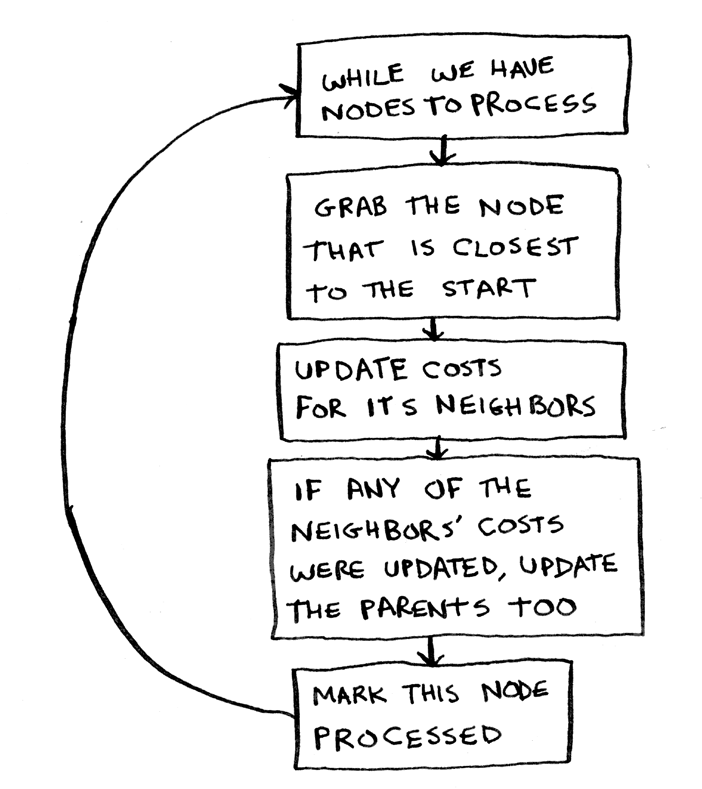

I’ll show you the code first and then walk through it. Here’s the code:

```python
node = find_lowest_cost_node(costs)    # Find the lowest-cost node that you haven’t processed yet.
while node is not None:                # If you’ve processed all the nodes, this while loop is done.
    cost = costs[node]
    neighbors = graph[node]
    for n in neighbors.keys():         # Go through all the neighbors of this node.       
        new_cost = cost + neighbors[n] # If it’s cheaper to get to this neighbor by going through 
        if costs[n] > new_cost:        ## this node …
            costs[n] = new_cost        # … update the cost for this node.
            parents[n] = node          # This node becomes the new parent for this neighbor.
    processed.append(node)             # Mark the node as processed.
    node = find_lowest_cost_node(costs)# Find the next node to process, and loop.
```

That’s Dijkstra’s algorithm in Python! I’ll show you the code for the function later. First, let’s see this find_lowest_cost_node algorithm code in action.

Find the node with the lowest cost.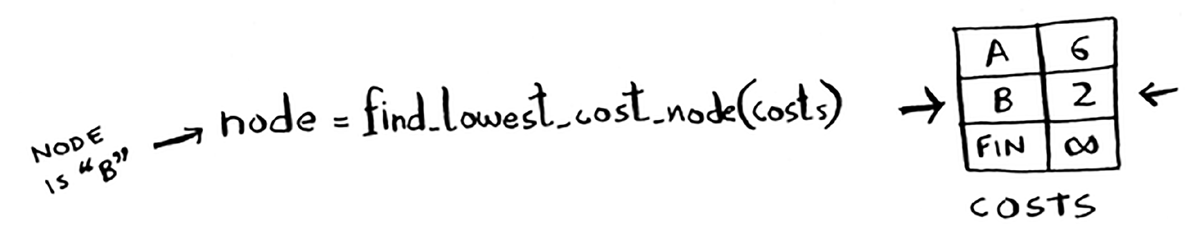

Get the cost and neighbors of that node.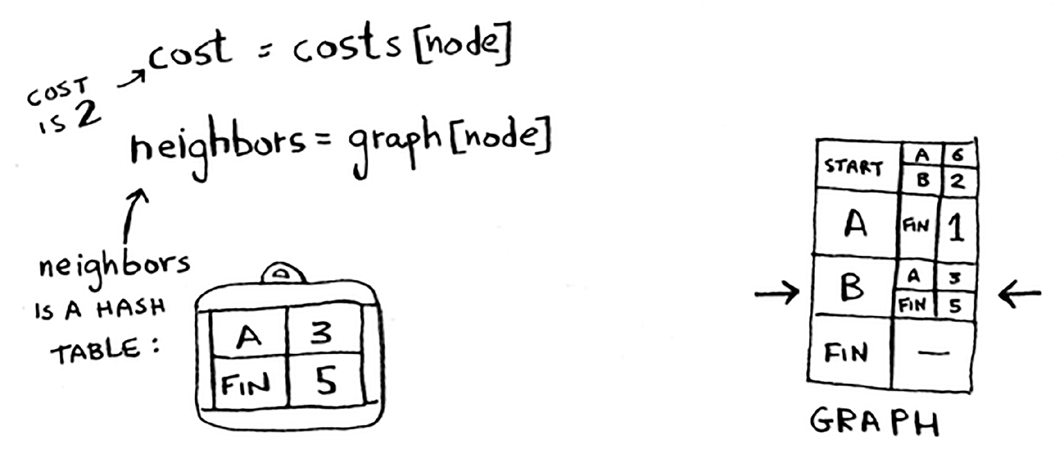

Loop through the neighbors.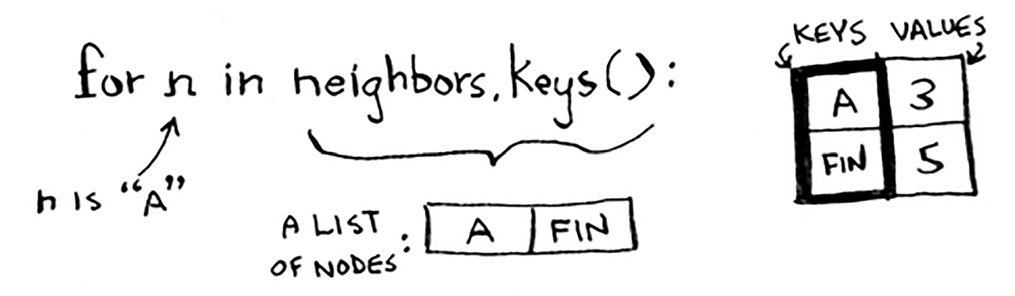

Each node has a cost. The cost is how long it takes to get to that node from the start. Here, you’re calculating how long it would take to get to node A if you went Start > node B > node A, instead of Start > node A.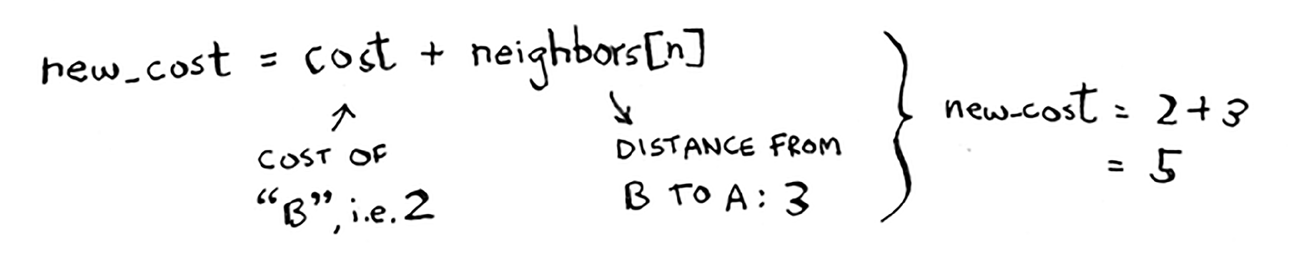

Let’s compare those costs.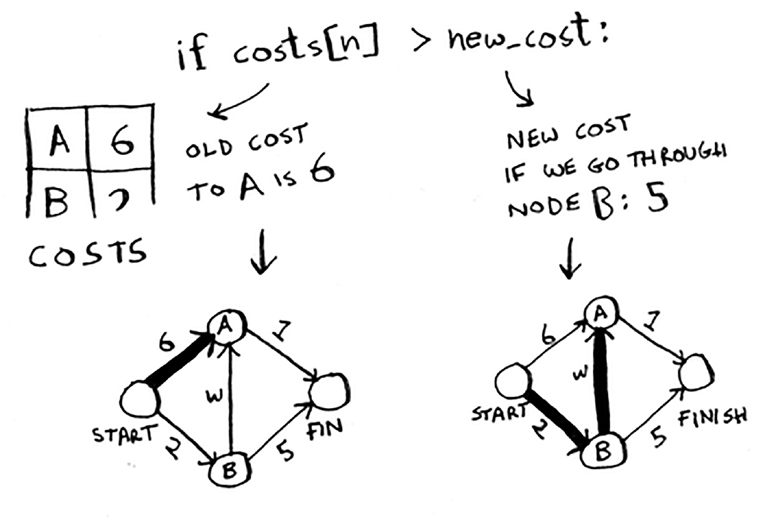

You found a shorter path to node A! Update the cost.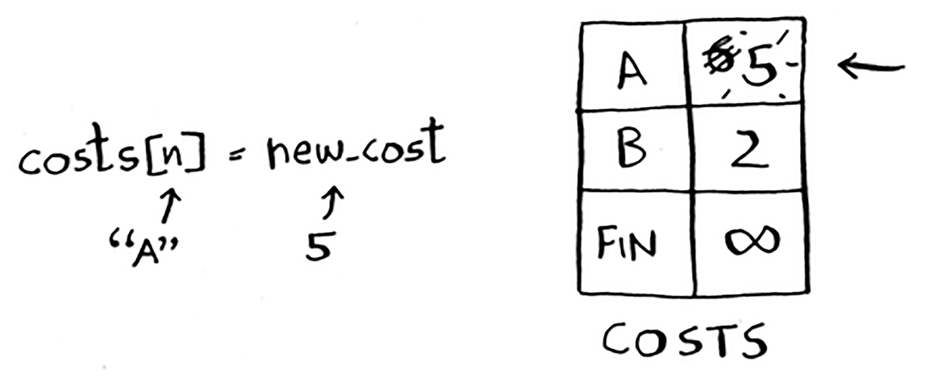

The new path goes through node B, so set B as the new parent.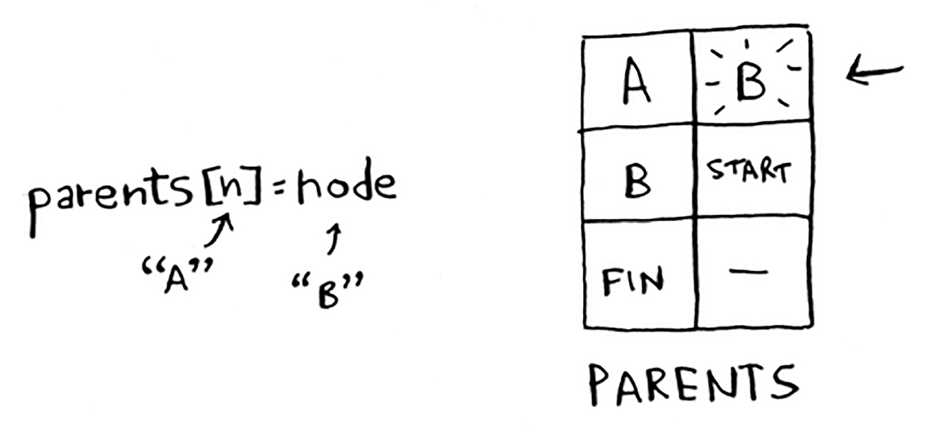

Ok, you’re back at the top of the loop. The next neighbor for is the Finish node.
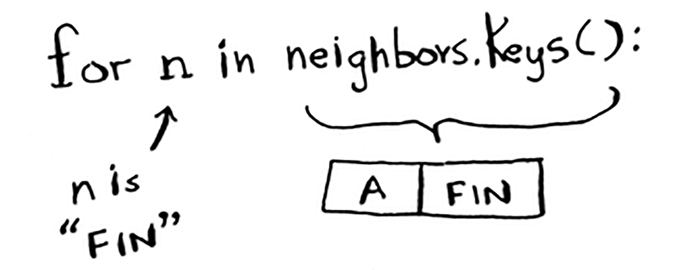

How long does it take to get to the finish if you go through node B?
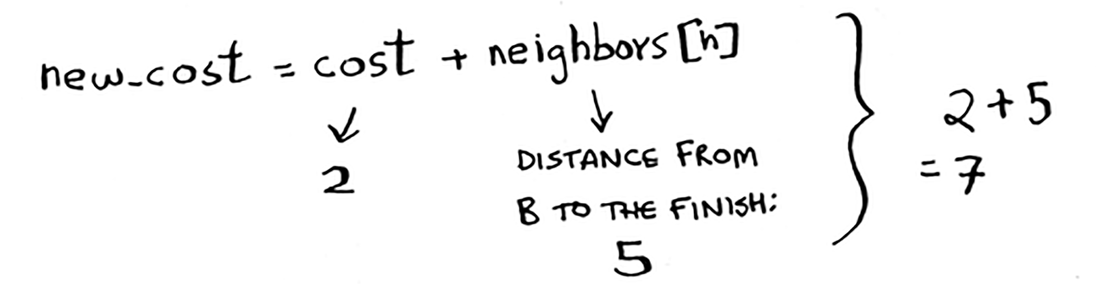

It takes 7 minutes. The previous cost was infinity minutes, and 7 minutes is less than that.
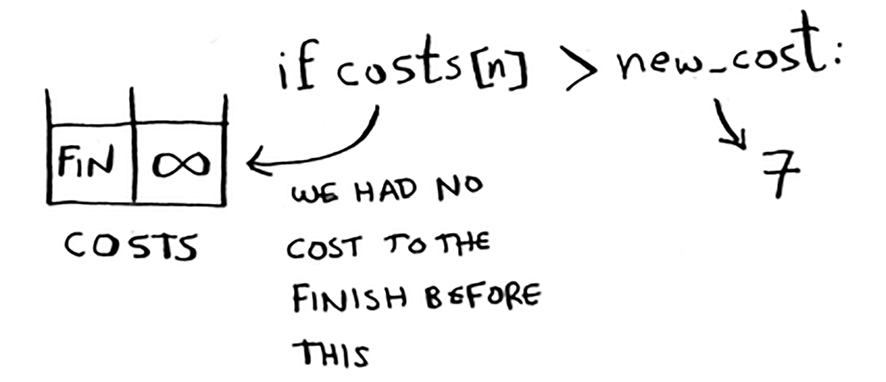

Set the new cost and the new parent for the Finish node.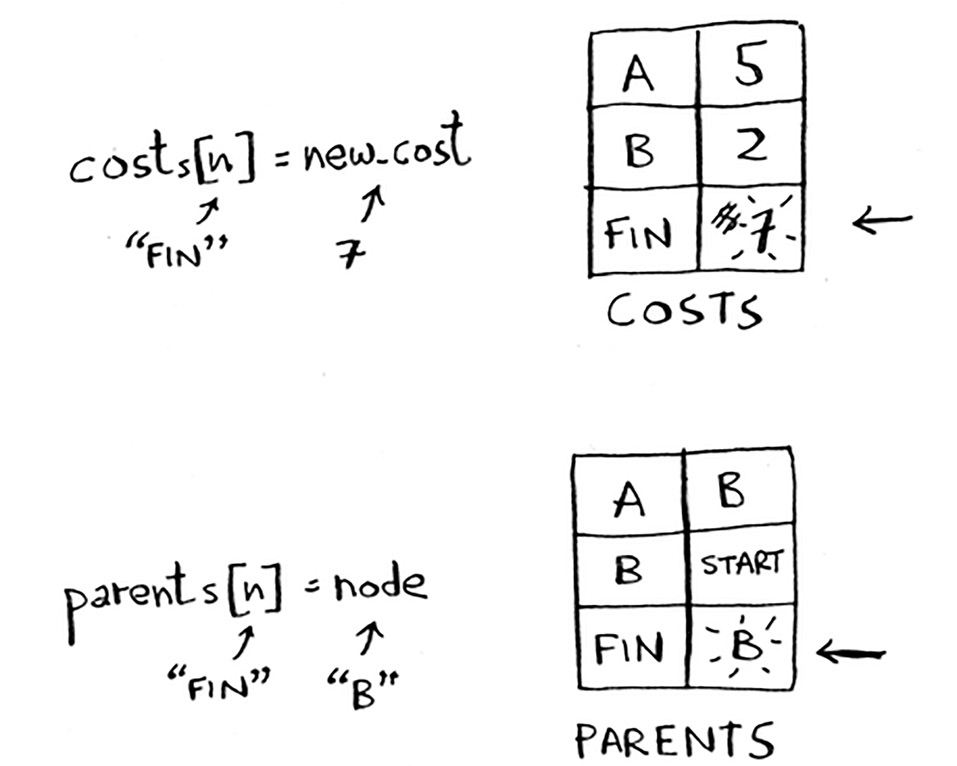

Ok, you updated the costs for all the neighbors of node B. Mark it as processed.
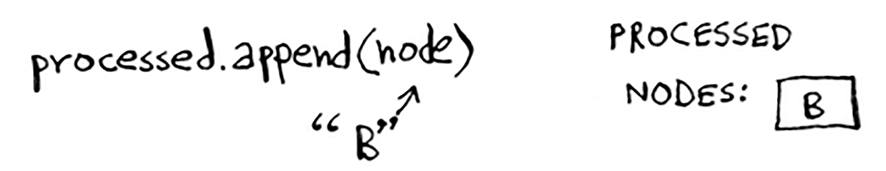

Find the next node to process.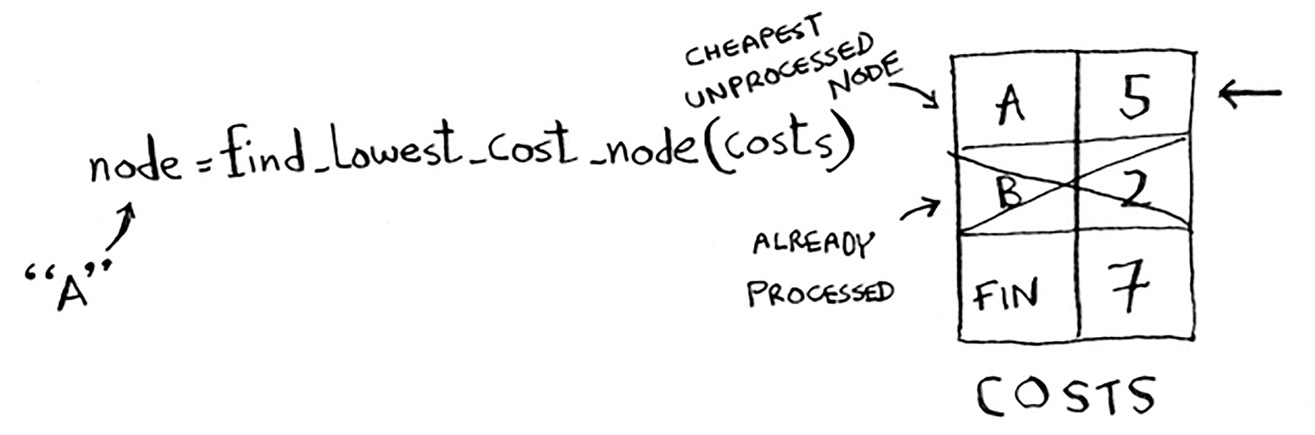

Get the cost and neighbors for node A.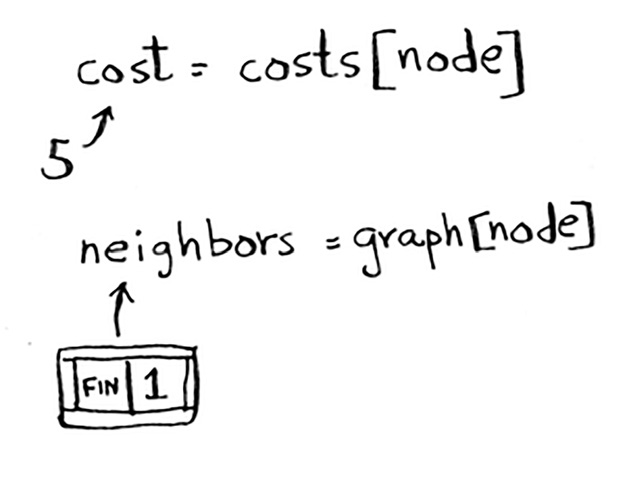

Node A only has one neighbor: the Finish node.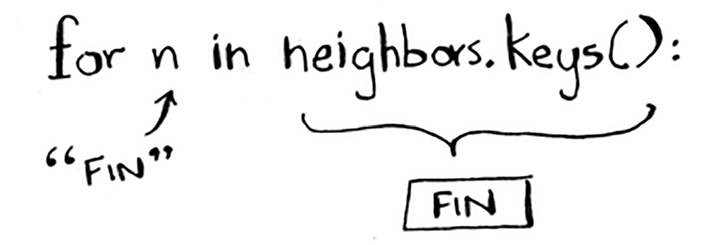

Currently it takes 7 minutes to get to the Finish node. How long would it take to get there if you went through node A?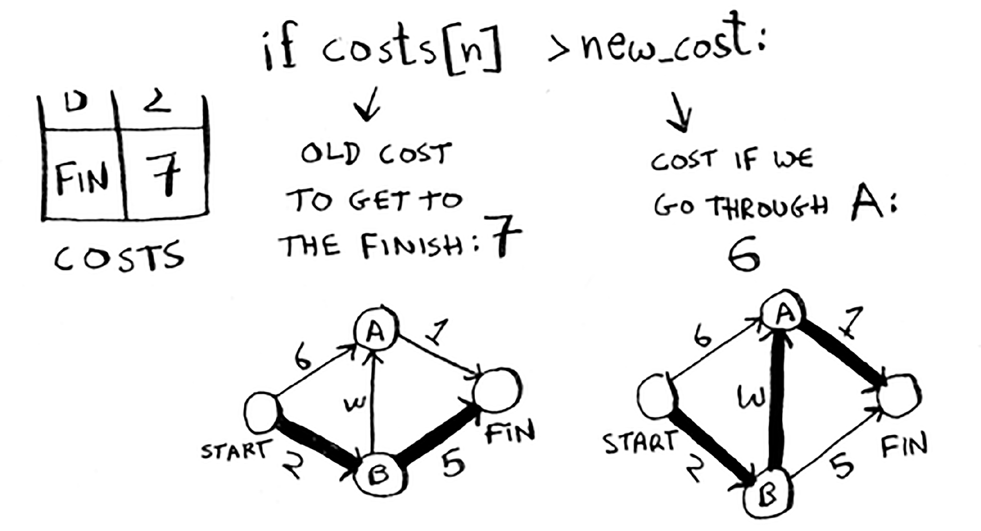

It’s faster to get to Finish from node A! Let’s update the cost and parent.
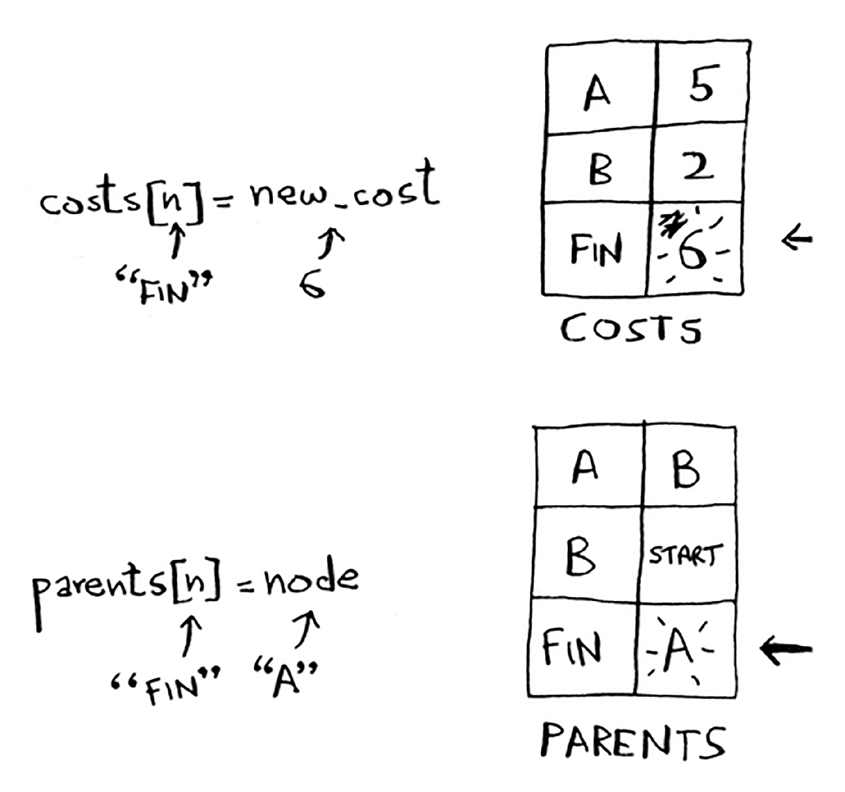

Once you’ve processed all the nodes, the algorithm is over. I hope the walkthrough helped you understand the algorithm a little better. Finding the lowest-cost node is pretty easy with the find_lowest_cost_node function. Here it is in code:

```python
def find_lowest_cost_node(costs):
    lowest_cost = float(“inf”)
    lowest_cost_node = None
    for node in costs:            # Go through each node.
        cost = costs[node]
        if cost < lowest_cost and node not in processed:   # If it’s the lowest cost so far and hasn’t been processed yet …
            lowest_cost = cost                             # … set it as the new lowest-cost node.
            lowest_cost_node = node
    return lowest_cost_node
```

### Python Program

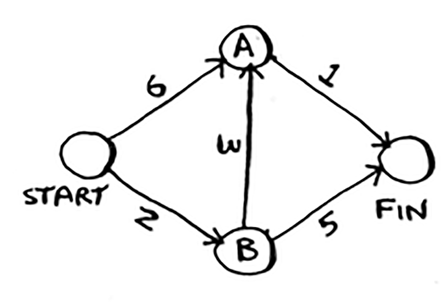

#### Setup graph table

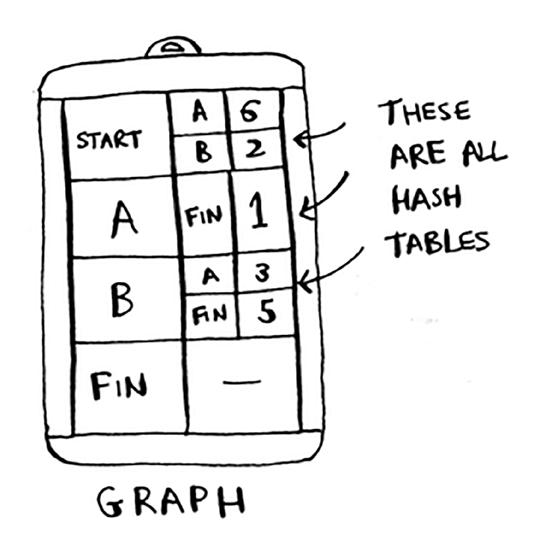

In [57]:
graph = {}

graph["start"] = {}
graph["start"]["a"] = 6
graph["start"]["b"] = 2

graph["a"] = {}
graph["a"]["fin"] = 1

graph["b"] = {}
graph["b"]["a"] = 3
graph["b"]["fin"] = 5

graph["fin"] = {}

graph

{'start': {'a': 6, 'b': 2},
 'a': {'fin': 1},
 'b': {'a': 3, 'fin': 5},
 'fin': {}}

#### Setup cost table

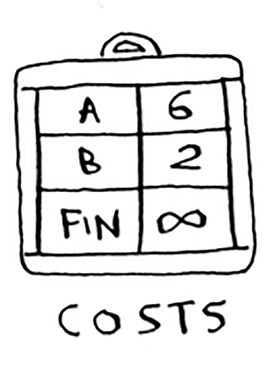

In [41]:
infinity = float("inf")
costs = {}
costs["a"] = 6
costs["b"] = 2
costs["fin"] = infinity

costs

{'a': 6, 'b': 2, 'fin': inf}

#### Setup parents table

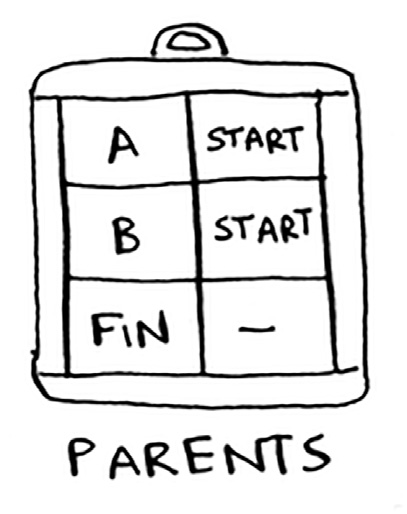

In [42]:
parents = {}
parents["a"] = "start"
parents["b"] = "start"
parents["fin"] = None

parents

{'a': 'start', 'b': 'start', 'fin': None}

#### Implement find_lowest_cost_node function

In [54]:
def find_lowest_cost_node(costs):
    lowest_cost = float("inf")
    lowest_cost_node = None
    for node in costs:
        cost = costs[node]
        if cost < lowest_cost and node not in processed:
            lowest_cost = cost
            lowest_cost_node = node
    print("Lowest cost node: ", lowest_cost_node)
    return lowest_cost_node

#### Implement algorithm

In [60]:
processed = []
node = find_lowest_cost_node(costs)
while node is not None:
    cost = costs[node]
    neighbors = graph[node]
    for n in neighbors.keys():
        new_cost = cost + neighbors[n]
        if costs[n] > new_cost:
            costs[n] = new_cost
            parents[n] = node
    processed.append(node)
    node = find_lowest_cost_node(costs)

Lowest cost node:  b
b a 2 5
b fin 2 7
b {'a': 'b', 'b': 'start', 'fin': 'b'} 7
Lowest cost node:  a
a fin 5 6
a {'a': 'b', 'b': 'start', 'fin': 'a'} 6
Lowest cost node:  fin
Lowest cost node:  None


In [61]:
print("Graph")
graph

Graph


{'start': {'a': 6, 'b': 2},
 'a': {'fin': 1},
 'b': {'a': 3, 'fin': 5},
 'fin': {}}

In [62]:
print("Costs")
costs

Costs


{'a': 5, 'b': 2, 'fin': 6}

In [63]:
print("Parents")
parents

Parents


{'a': 'b', 'b': 'start', 'fin': 'a'}

## Exercise

### 7.1 In each of these graphs, what is the weight of the shortest path from start to finish?

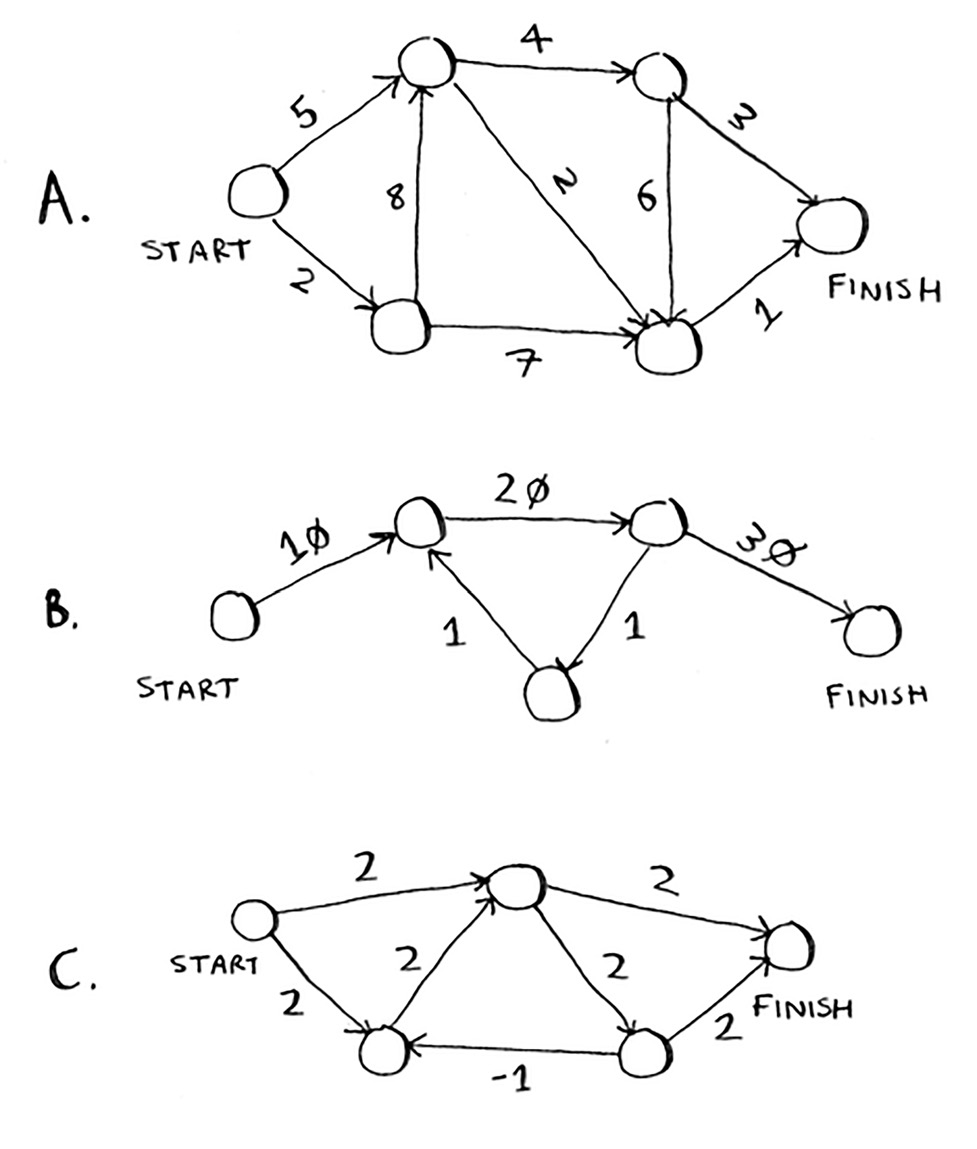

**Answer**

A. 8

B. 60

C. No shortest path is possible (negative-weight cycle).

## Recap

- Breadth-first search is used to calculate the shortest path for an unweighted graph.
- Dijkstra’s algorithm is used to calculate the shortest path for a weighted graph.
- Dijkstra’s algorithm works when all the weights are positive.
- If you have negative weights, use the Bellman-Ford algorithm.